In [1]:
# general
import pandas as pd
from pydataset import data

# vis
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# model
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("50k-posts-from-relationship-advice.csv", header = None)

In [5]:
df.head()

,0,1,2,3
0,24,25,3iwivb,I'm [25/M] having issues with my GF [24/F] Facebook profile
1,18,20,3iwrcd,I [20M] asked a friend [18F] to the movies. Did I ask her out on a date?
2,17,16,3iwucq,Me (16/M) not sure if co-worker (17/F) is being flirtatious or is she just being friendly
3,17,16,3iwx0l,Me [16/M] Not sure if my co-worker [17/F] is being very flirtatious or just friendly
4,26,22,3iwx5t,Me [22/M] and my GF [26/F] having been seeing each other for a few months. Got some Qu...


In [6]:
df.columns = ['F', 'M', 'post_id', 'post']

In [18]:
df.describe()

,F,M
count,47540.000000,47540.000000
mean,23.050715,24.269605
std,23.436143,6.315841
min,0.000000,5.000000
25%,19.000000,20.000000
50%,22.000000,23.000000
75%,25.000000,27.000000
max,5000.000000,420.000000


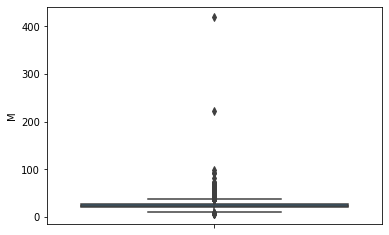

In [8]:
sns.boxplot(y = 'M', data = df)

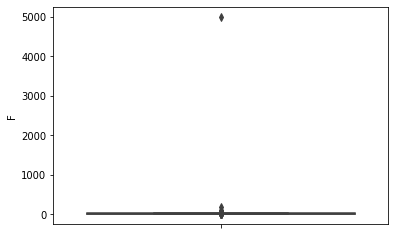

In [9]:
sns.boxplot(y = 'F', data = df)

In [11]:
Q1 = df.M.quantile(0.25)
Q3 = df.M.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

20.0
27.0
7.0


In [16]:
df = df[((df.M > (Q1 - (1.5 * IQR))) & (df.M < (Q3 + 1.5 * IQR)))]

In [18]:
Q1_f = df.F.quantile(0.25)
Q3_f = df.F.quantile(0.75)
IQR = Q3_f - Q1_f
df = df[((df.F > (Q1_f - 1.5 * IQR)) & (df.F < (Q3_f + 1.5 * IQR)))]

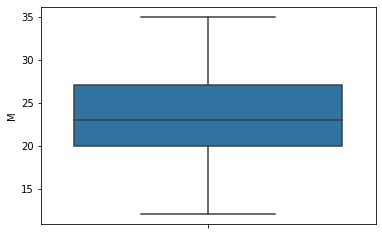

In [17]:
sns.boxplot(y = 'M', data = df)

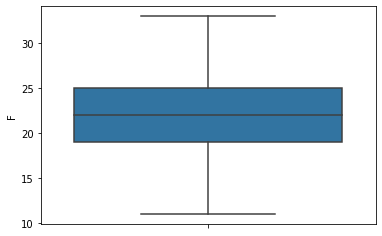

In [19]:
sns.boxplot(y = 'F', data = df)

In [11]:
df = df[(df.M < 100) &(df.F < 100)]

In [12]:
df.describe()

,F,M
count,47536.000000,47536.000000
mean,22.941876,24.257279
std,5.259306,5.980547
min,0.000000,5.000000
25%,19.000000,20.000000
50%,22.000000,23.000000
75%,25.000000,27.000000
max,99.000000,99.000000


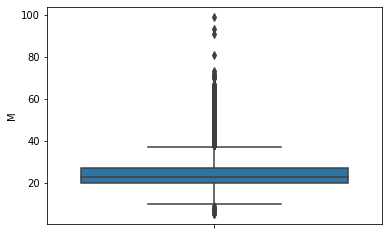

In [18]:
sns.boxplot(y = 'M', data = df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47540 entries, 0 to 47539
Data columns (total 4 columns):
F          47540 non-null int64
M          47540 non-null int64
post_id    47540 non-null object
post       47540 non-null object
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


Text(0, 0.5, 'inertia')

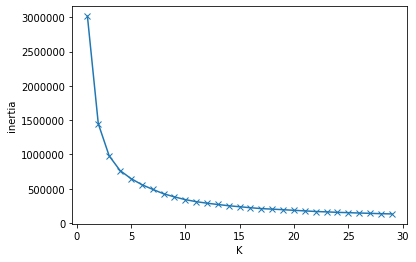

In [16]:
subset = df[['F', 'M']]

k_values = []
inertias = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters=k).fit(subset)
    inertias.append(kmeans.inertia_)
    k_values.append(k)

plt.plot(k_values, inertias, marker='x')
plt.xlabel('K')
plt.ylabel('inertia')

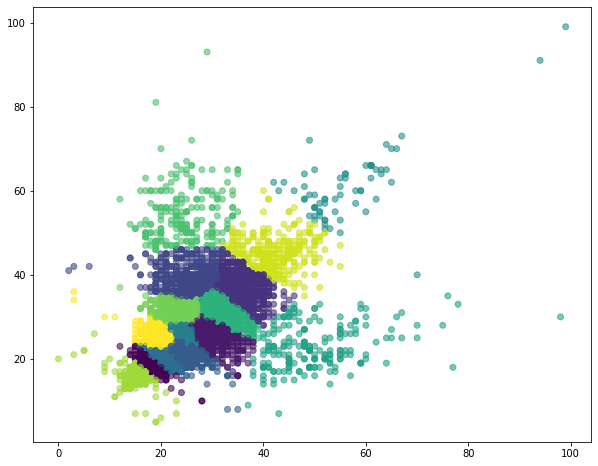

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(df.F, df.M, c = kmeans.labels_, alpha = .6)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


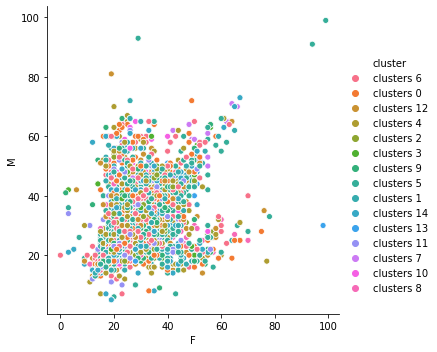

In [22]:
X = df[['F','M']]

kmeans = KMeans(n_clusters=15).fit(X)

X['cluster'] = 'clusters ' + pd.Series(kmeans.predict(X)).astype(str)

sns.relplot(data=X, hue='cluster', x='F', y='M')

In [17]:
X = df[['F','M']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print(kmeans.cluster_centers_)
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centers

[[  28.44037559   30.77867203]
 [5000.           21.        ]
 [  20.43534892   21.29535076]]


,F,M
0,28.440376,30.778672
1,5000.000000,21.000000
2,20.435349,21.295351


In [ ]:
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(iris.sepal_length, iris.petal_length, iris.petal_width, c=kmeans.labels_)
ax.scatter(centers.sepal_length, centers.petal_length, centers.petal_width, c='pink', s=10000, alpha=.4)
ax.set(xlabel='sepal_length', ylabel='petal_length', zlabel='petal_width')